In [1]:
import os
import sys
sys.path.append("../library")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import read_data as rd

from dataProcess import *
from defaultPlot import *
from stringFormat import *

In [28]:
param = rd.set_default()
param.link_size = 150000
DATA_DIR = os.path.join('data', rd.network_name(param))

In [40]:
strategy_list = [0.85]
packet_list = {0.85: [5, 10, 100],
               1.0: [4, 5, 6, 7, 8]}
iteration_list = {0.85: 4000, 1.0: 200}
active_history = {}


In [41]:
for strategy in strategy_list:
    for packet in packet_list[strategy]:
        param.new_packet = packet
        param.max_iteration = iteration_list[strategy]
        param.strategy = strategy
        file_name = "numActive_" + rd.dynamics_name(param) + '.csv'
        active_history[param.strategy, packet] = pd.read_csv(os.path.join(DATA_DIR, file_name), header=None)


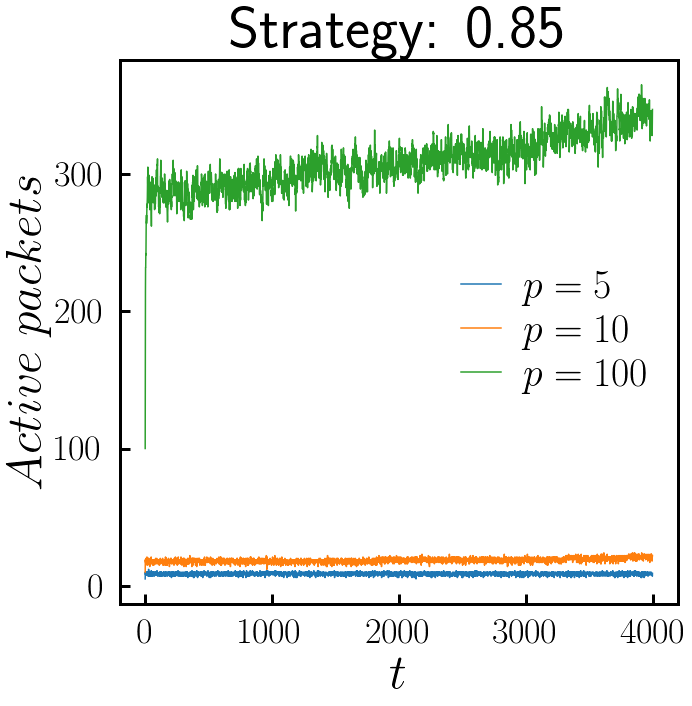

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))
strategy = 0.85

for packet in packet_list[strategy]:
    ax.plot(active_history[strategy, packet].index,
            active_history[strategy, packet].values[:, 0],
            '-', label=latex_string("p={}".format(packet)))

ax.set_xlabel(latex_string("t"))
ax.set_ylabel(latex_string("Active\ packets"))
ax.legend(loc='best')
ax.set_title("Strategy: {}".format(strategy))
# ax.set_yscale('log')

fig.show()
